In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots will have a white background with light grid lines
sns.set_style("whitegrid")

# Trying different encodings to avoid errors from appearing 
encodings_to_try = ['latin-1', 'iso-8859-1', 'cp1252', 'windows-1252']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(r"C:\Users\almagd\Downloads\Telegram Desktop\Original Data.csv", encoding=encoding)
        print(f"Successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")
        continue

# Convert 'Order Date' to datetime format so python can understand
# (errors="coerce")If there’s a bad/missing date, it will turn it into NaT (Not a Time) instead of crashing
#dayfirst=true reads date in european format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce", dayfirst=True)

df.head()

Successfully read with encoding: latin-1


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [27]:
df.shape

(51290, 27)

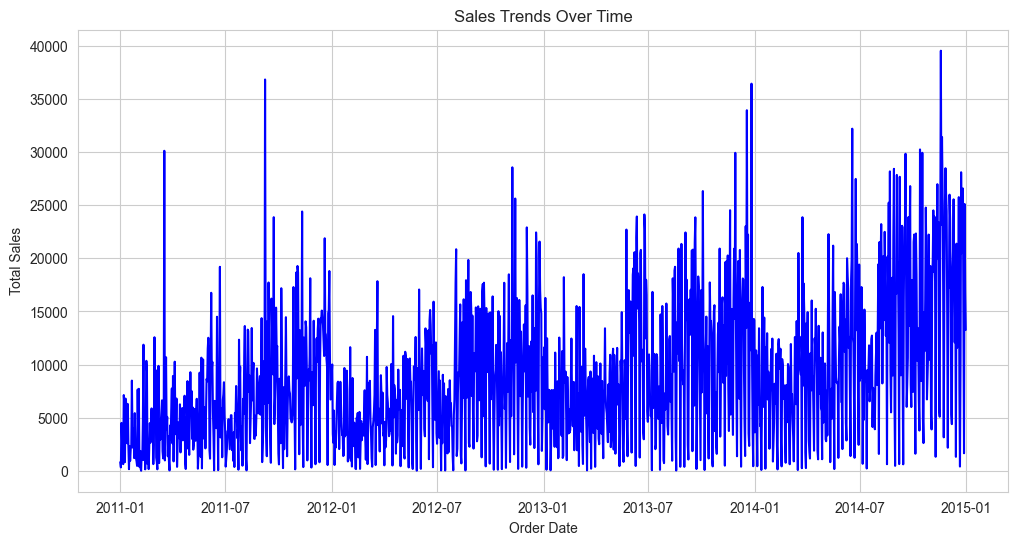

In [10]:
# Group sales by order date
#Within each group (each date), we take the "Sales" column and sum it up
sales_trend = df.groupby("Order Date")["Sales"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12,6)) #Creates a new blank figure with 12 inches wide and 6 inches tall
plt.plot(sales_trend["Order Date"], sales_trend["Sales"], color="blue") #time series line plot of sales over dates.
plt.title("Sales Trends Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()


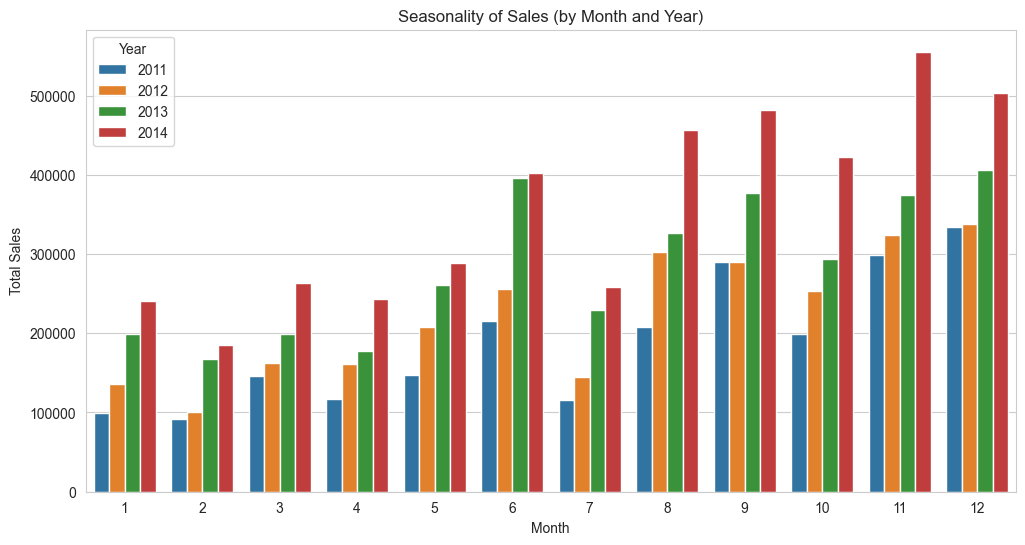

In [12]:
# Extract Year and Month from Order Date
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Group sales & profit by Year-Month
monthly_sales = df.groupby(["Year","Month"])[["Sales","Profit"]].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12,6))
sns.barplot(x="Month", y="Sales", hue="Year", data=monthly_sales, palette="tab10") #hue="Year" Different colors for different years ,,palette="tab10" Nice 10-color palette for different years
plt.title("Seasonality of Sales (by Month and Year)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year") #legend to show which color corresponds to which year
plt.show()


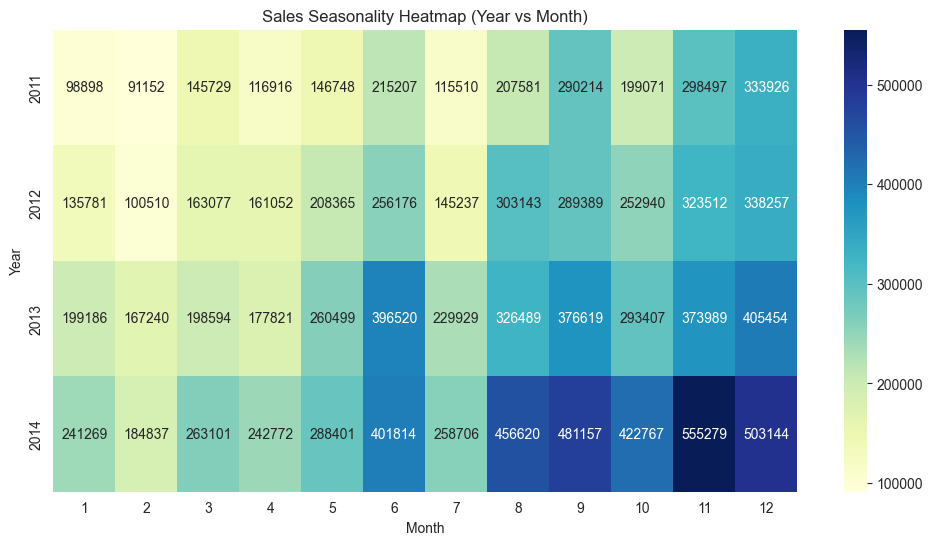

In [23]:
#Turns the grouped data into a matrix
# Pivot the data: rows = Year, columns = Month, values = total Sales
sales_pivot = monthly_sales.pivot(index="Year", columns="Month", values="Sales")

# Plot heatmap
#Each cell represents Sales in that Year & Month.
#annot=True  Writes the sales numbers inside each cell.
plt.figure(figsize=(12,6))
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sales Seasonality Heatmap (Year vs Month)")
plt.xlabel("Month")#X-axis = months (1 - Jan, 12 - Dec).
plt.ylabel("Year")#Y-axis = years (2011, 2012, 2013…)
plt.show()
#Darker = higher sales
#Brighter=lower sales


C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\1720339190.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Sales", data=external, estimator=sum, palette="Set2")


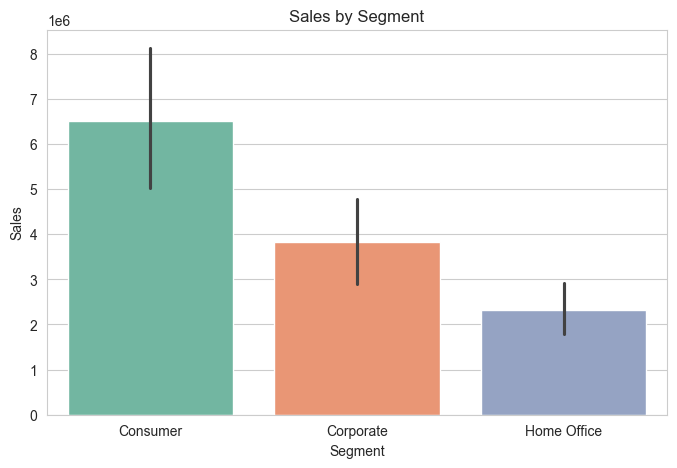

C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\1720339190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Profit", data=external, estimator=sum, palette="Set1")


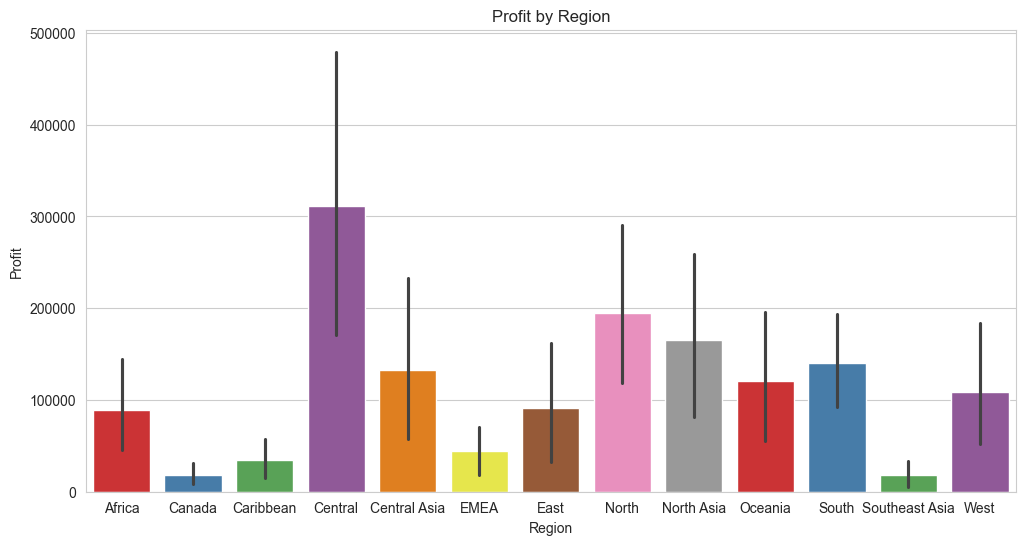

In [21]:
# Group by Region, Market, Segment, and Order Priority
#reset_index():Makes sure the grouped categories become normal columns (not just index labels).
external = df.groupby(["Region","Market","Segment","Order Priority"])[["Sales","Profit","Quantity"]].sum().reset_index()

# Sales by Segment
plt.figure(figsize=(8,5))
#X-axis will show Segments (Consumer, Corporate, Home Office)
#data=external:Uses the grouped data we just made
#estimator=sum : Ensures sales values are summed (not averaged)
sns.barplot(x="Segment", y="Sales", data=external, estimator=sum, palette="Set2")
plt.title("Sales by Segment")
plt.show()

# Profit by Region
plt.figure(figsize=(12,6)) #Creates a new figure with size 8x5 inches.
sns.barplot(x="Region", y="Profit", data=external, estimator=sum, palette="Set1")
plt.title("Profit by Region")
plt.show()


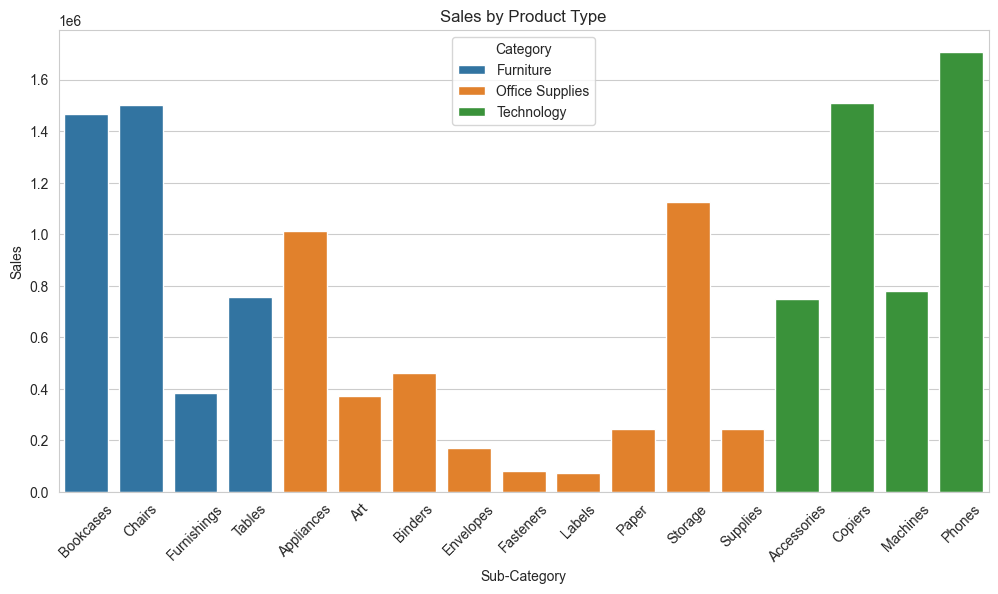

In [29]:
# Group by Category and Sub-Category
product_sales = df.groupby(["Category","Sub-Category"])[["Sales","Quantity","Profit"]].sum().reset_index()

# Calculate Profit Margin = Profit / Sales
product_sales["Profit Margin"] = product_sales["Profit"] / product_sales["Sales"]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category", y="Sales", hue="Category", data=product_sales) #hue="Category" Different colors for each main Category (Furniture, Technology
plt.xticks(rotation=45) #Rotates x-axis labels by 45 degrees so the sub-category names don’t overlap
plt.title("Sales by Product Type")
plt.show()
#identify which products are profitable relative to sales volume.
#Each bar = Sales for a sub-category like Phones 
#Colors distinguish which main category it belongs to.
#higher bars higher sales


C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\2542570061.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby("Discount Bin")[["Quantity","Profit"]].mean().reset_index()


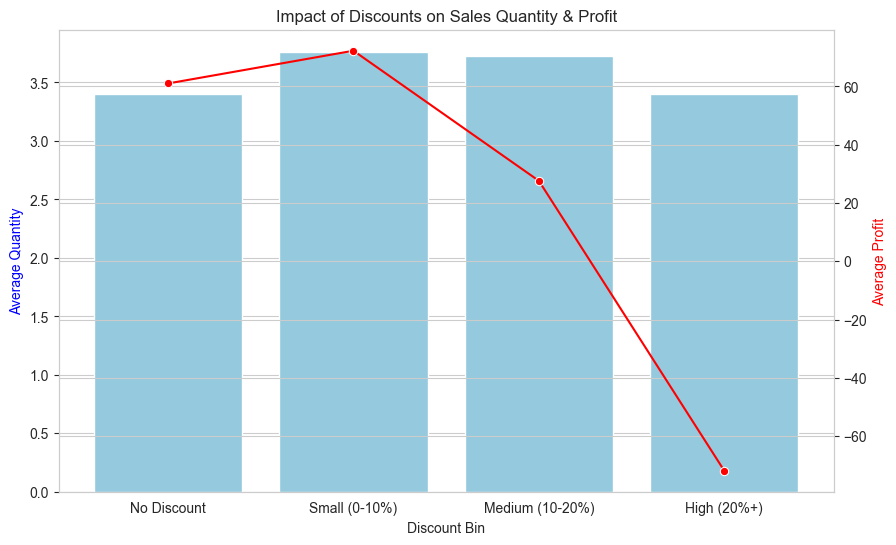

In [18]:
# Create discount bins
bins = [0, 0.1, 0.2, 1.0]
labels = ["0-10% (Small)", "10-20% (Medium)", "20%+ (High)"]
df["Discount Bin"] = pd.cut(df["Discount"], bins=[-0.01, 0, 0.1, 0.2, 1], labels=["No Discount", "Small (0-10%)", "Medium (10-20%)", "High (20%+)"])

# Group by bins
discount_analysis = df.groupby("Discount Bin")[["Quantity","Profit"]].mean().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x="Discount Bin", y="Quantity", data=discount_analysis, color="skyblue", ax=ax1)
ax1.set_ylabel("Average Quantity", color="blue")

ax2 = ax1.twinx()
sns.lineplot(x="Discount Bin", y="Profit", data=discount_analysis, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Profit", color="red")

plt.title("Impact of Discounts on Sales Quantity & Profit")
plt.show()


In [1]:
# Group by Category and Discount Bin (with observed=True to silence the warning)
product_discount = df.groupby(["Category","Discount Bin"], observed=True)[["Quantity","Profit"]].mean().reset_index()

# Heatmap to see the relationship (using pivot_table instead of pivot)
#Reshapes the data into a matrix
pivot = product_discount.pivot_table(index="Category", columns="Discount Bin", values="Profit")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn")
#fmt=".1f" shows numbers with one decimal place
plt.title("Profit by Category & Discount Bin")
plt.show
#Each cell in the heat map shows the average profit for a category + discount level
#Which products are sensitive to discounts (e.g., Phones need discounts to sell).

#Which products are profitable even without discounts (e.g., Furniture or Accessories).

NameError: name 'df' is not defined

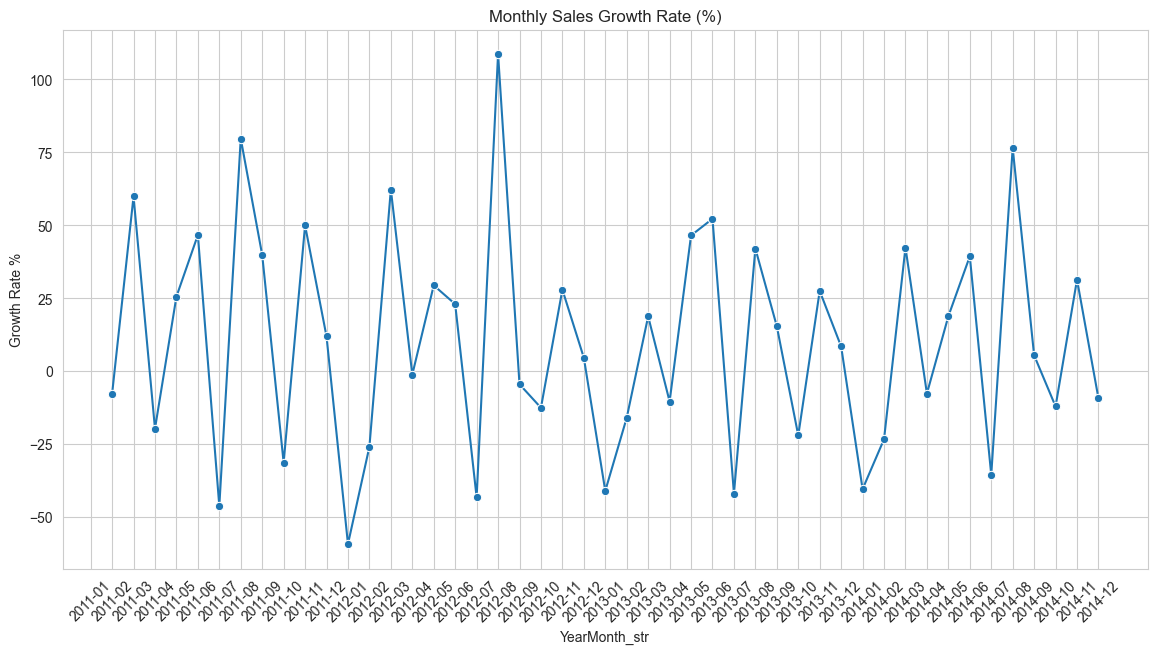

In [43]:
# 1- (Growth Rate)

df["YearMonth"] = df["Order Date"].dt.to_period("M")#Creates a new column YearMonth from the Order Date
#dt.to_period("M") converts each order date into a year-month format
#lets us aggregate sales by month.
monthly_sales = df.groupby("YearMonth")["Sales"].sum().reset_index()
monthly_sales["Growth Rate"] = monthly_sales["Sales"].pct_change() * 100  #Calculates the percentage change in sales from one month to the next
#pct_change() computes growth

#transform YearMonth to string
monthly_sales["YearMonth_str"] = monthly_sales["YearMonth"].astype(str)

plt.figure(figsize=(14,7))
sns.lineplot(x="YearMonth_str", y="Growth Rate", data=monthly_sales, marker="o")
plt.title("Monthly Sales Growth Rate (%)")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate %")
plt.show()

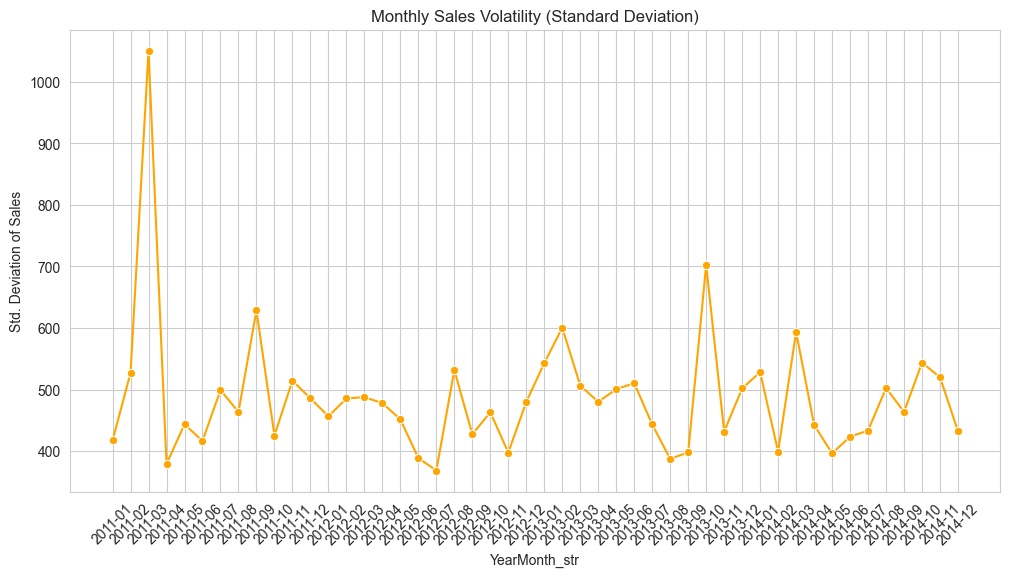

In [47]:
# 2. (Volatility)
#Standard deviation is a measure of volatility higher values mean sales fluctuated a lot that month, lower values mean sales were more stable

volatility = df.groupby("YearMonth")["Sales"].std().reset_index()

# transform YearMonth to string
volatility["YearMonth_str"] = volatility["YearMonth"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x="YearMonth_str", y="Sales", data=volatility, marker="o", color="orange")
#x-axis = YearMonth_str (the months)
#y-axis = Sales (but here it represents standard deviation
plt.title("Monthly Sales Volatility (Standard Deviation)")
plt.xticks(rotation=45)
plt.ylabel("Std. Deviation of Sales")
plt.show()

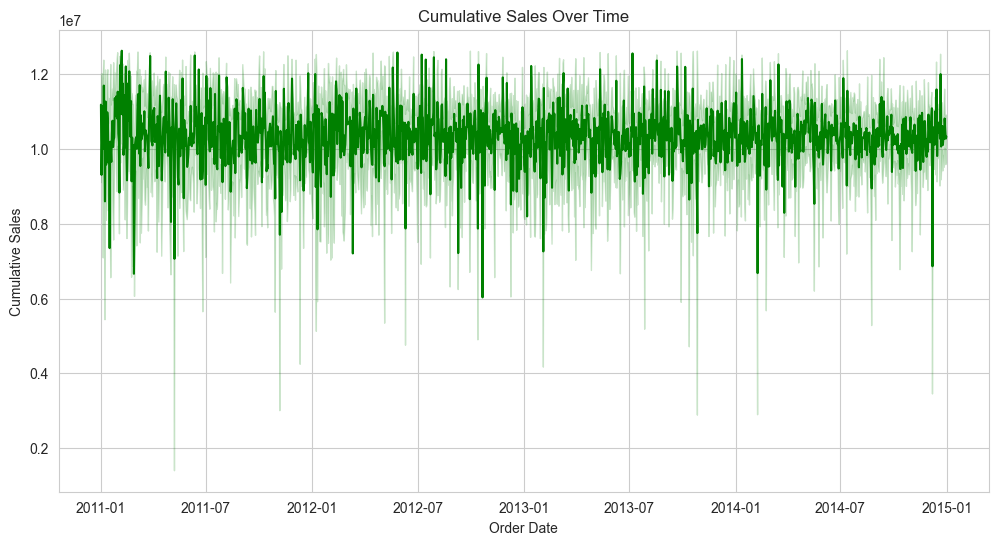

In [50]:
# Creates a new column in the dataframe called Cumulative Sales
#it keeps adding each new order’s sales to the total so far
# ----------------------------
df["Cumulative Sales"] = df["Sales"].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(x="Order Date", y="Cumulative Sales", data=df, color="green")
plt.title("Cumulative Sales Over Time")
plt.ylabel("Cumulative Sales")
plt.show()
#shows how total sales accumulate over time.
#The slope of the line tells us how fast sales are growing
#A steep slope = strong sales in that period.......A flat slope = weak sales or no orders.

C:\Users\almagd\AppData\Local\Temp\ipykernel_4528\2349329010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Value Segment", data=customer_sales, palette="Set2")


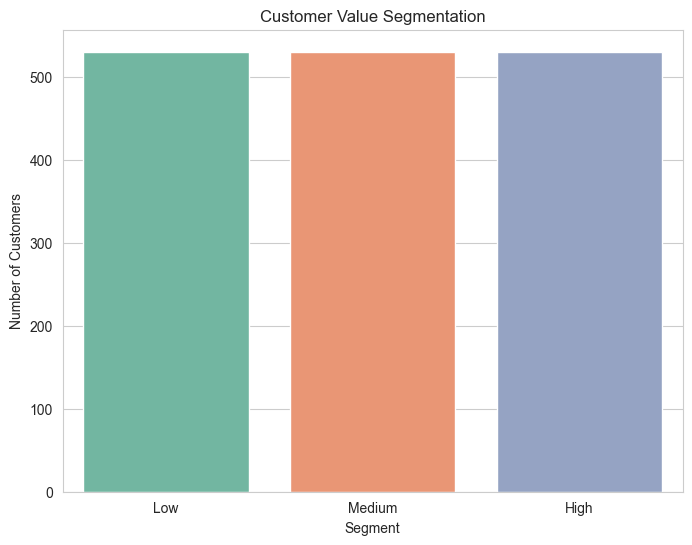

In [5]:
# حساب إجمالي المبيعات لكل عميل
#For each customer, calculates the total sales amount

customer_sales = df.groupby("Customer ID")["Sales"].sum().reset_index()

# pd.qcut=divides customers into 3 equal-sized group based on their total sales value.Labels them as "Low", "Medium", and "High"
customer_sales["Value Segment"] = pd.qcut(customer_sales["Sales"], q=3, labels=["Low","Medium","High"])

plt.figure(figsize=(8,6))
sns.countplot(x="Value Segment", data=customer_sales, palette="Set2")
plt.title("Customer Value Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


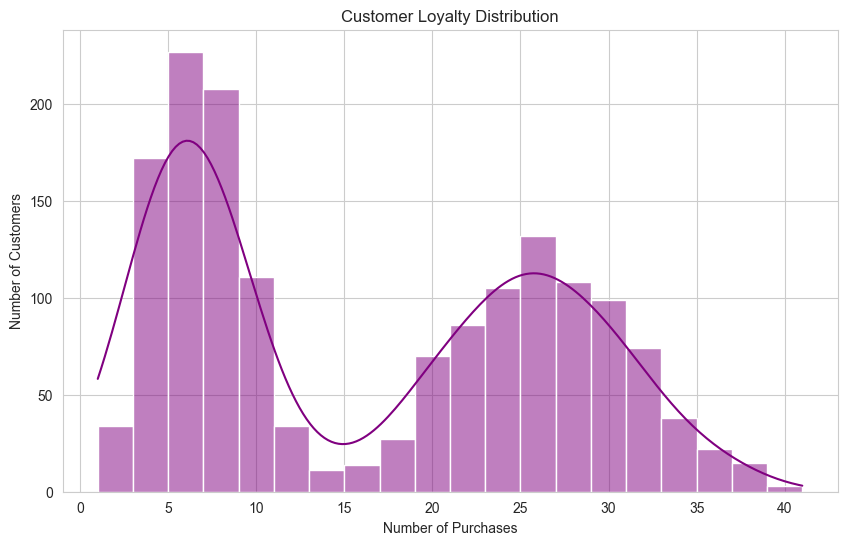

In [7]:
# حساب عدد مرات الشراء لكل عميل
#For each customer, counts the unique Order IDs
#example: Customer C001 placed 3 different orders
loyalty = df.groupby("Customer ID")["Order ID"].nunique().reset_index()
loyalty.columns = ["Customer ID","Purchase Count"]
#"Customer ID"  who the customer is
#"Purchase Count" how many times they bought from us.

plt.figure(figsize=(10,6))
sns.histplot(loyalty["Purchase Count"], bins=20, kde=True, color="purple")
#loyalty["Purchase Count"] = number of purchases each customer made.
#kde=True adds a smooth line to show the distribution curve.
plt.title("Customer Loyalty Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


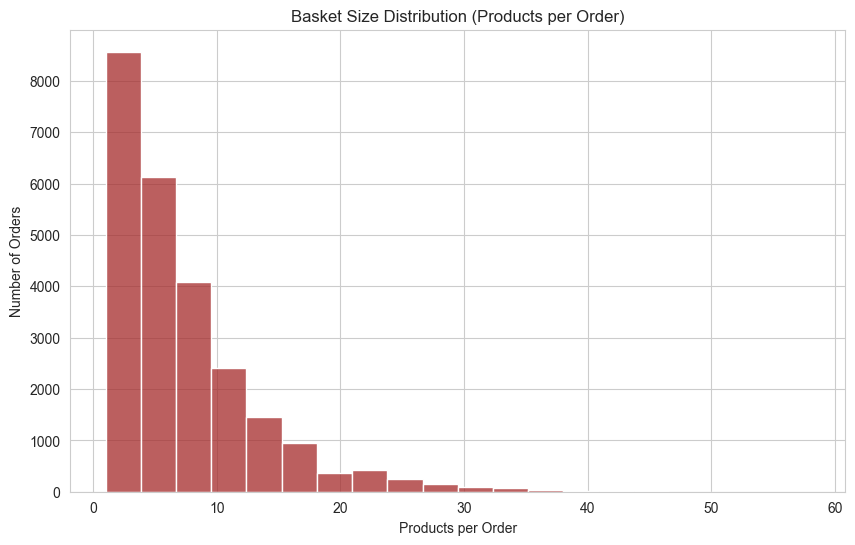

In [9]:
# حساب متوسط عدد المنتجات في كل فاتورة( basket size)
#Groups the dataset by Order ID (each unique order)
#sums up the total number of items in that order
basket = df.groupby("Order ID")["Quantity"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.histplot(basket["Quantity"], bins=20, color="brown")
#basket["Quantity"] the number of products per order
#bins=20 divides the data into 20 ranges (0–2, 3–5,...)
plt.title("Basket Size Distribution (Products per Order)")
plt.xlabel("Products per Order")#X-axis = how many products in an order
plt.ylabel("Number of Orders")#Y-axis = how many orders fall into that basket size.
plt.show()
#This chart shows how many products customers usually buy per order

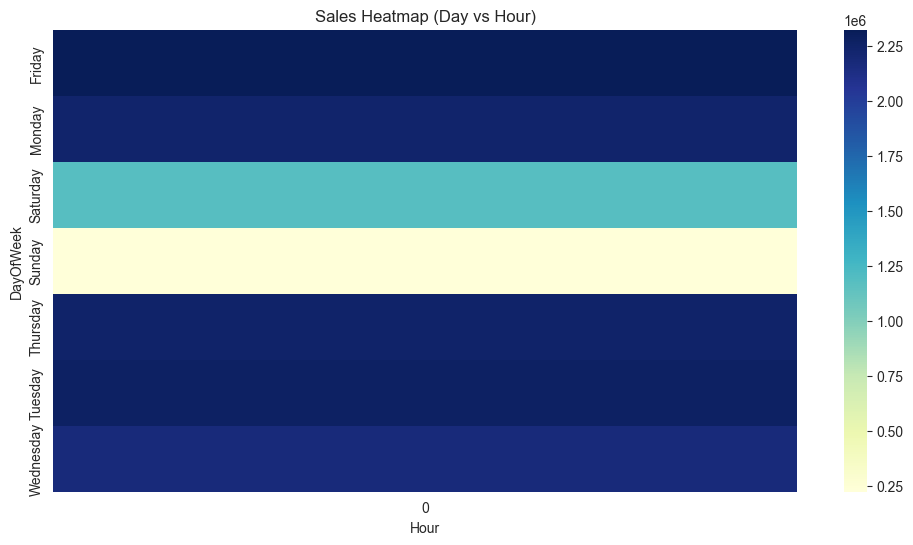

In [13]:
# Convert Order Date to datetime
#errors="coerce" means if there are invalid values (like wrong date format), they’ll be replaced with NaT (Not a Time).
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# If "Order Time" exists, use it otherwise extract from Order Date
if "Order Time" in df.columns:
    df["Hour"] = pd.to_datetime(df["Order Time"], format="%H:%M:%S").dt.hour
else:
    df["Hour"] = df["Order Date"].dt.hour
#Checks if there’s a separate Order Time column
#If yes converts it to datetime and extracts the hour
#If no extracts the hour directly from Order Date


#Creates a new column DayOfWeek by extracting the day name (Monday, Tuesday...) from the order date.
df["DayOfWeek"] = df["Order Date"].dt.day_name()

# Pivot Table for Heatmap
#rows = days of the week
#columns = hours of the day
#sales are summed up.
pivot = df.pivot_table(values="Sales", index="DayOfWeek", columns="Hour", aggfunc="sum")

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Sales Heatmap (Day vs Hour)")
plt.show()

#Each cell is colored according to the sales amount
#Bigger sales = darker/stronger color.

